<a href="https://colab.research.google.com/github/mateus-neres/projeto_de_analise_estatistica_enem_2019/blob/main/etapa08_normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TESTE DE NORMALIDADE**

##Vários métodos de estimação e teste de hipóteses foram criados sob a suposição de que a amostra aleatória tenha a distribuição normal

In [54]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [55]:
enem_sp = pd.read_csv("/content/drive/MyDrive/curso_Udemy/curso_estatistica_python/enem_2019_tratado.csv",
                      sep=",", encoding="iso-8859-1")

In [56]:
enem_sp.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,sim


In [57]:
enem_tupa = enem_sp.loc[enem_sp.MUNICIPIO_RESIDENCIA == "Tupã"]
enem_tupa.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1623,"1,90E+11",Tupã,19,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,465.3,578.4,543.6,42.7,inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,sim
2281,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,598.5,533.4,579.8,656.8,inglês,1.0,140.0,140.0,140.0,200.0,180.0,800.0,sim
5493,"1,90E+11",Tupã,18,F,1,branca,2,2,pública,NaN,NaN,1,1,1,1,492.3,518.4,550.9,515.6,espanhol,1.0,160.0,120.0,140.0,120.0,100.0,640.0,sim
7465,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,576.7,539.4,562.8,628.4,inglês,1.0,140.0,160.0,160.0,180.0,160.0,800.0,sim
7898,"1,90E+11",Tupã,28,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,61.0,650.5,562.8,701.5,inglês,1.0,120.0,160.0,120.0,120.0,140.0,660.0,sim


TESTES DE NORMALIDADE

Existem testes de normalidade numéricos e testes gráficos:

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

Histograma

QQplot

In [58]:
import plotly.express as px
grafico = px.histogram(enem_sp, x = "NOTA_REDACAO", nbins = 32, histnorm = "percent",)
grafico.update_layout(width=500, height=500, title_text="Distribuição de notas de redação")
grafico.show()

In [59]:
grafico = px.histogram(enem_tupa, x = "NOTA_REDACAO", histnorm = "percent")
grafico.update_layout(width = 500, height = 500, title_text="Distribuição notas de redação" )
grafico.show()

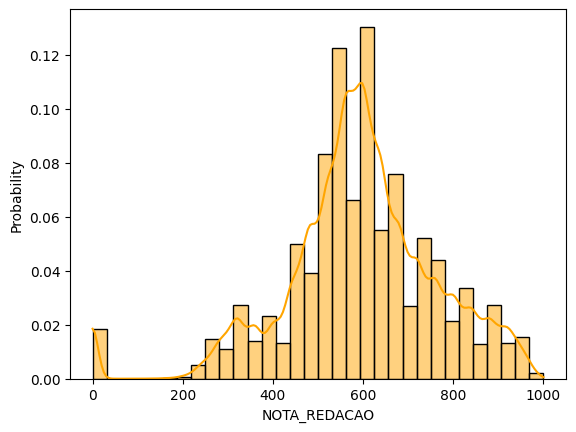

In [60]:
import seaborn as sns
sns.histplot(enem_sp, x = "NOTA_REDACAO", bins = 32, color = "orange", kde = True, stat = "probability");

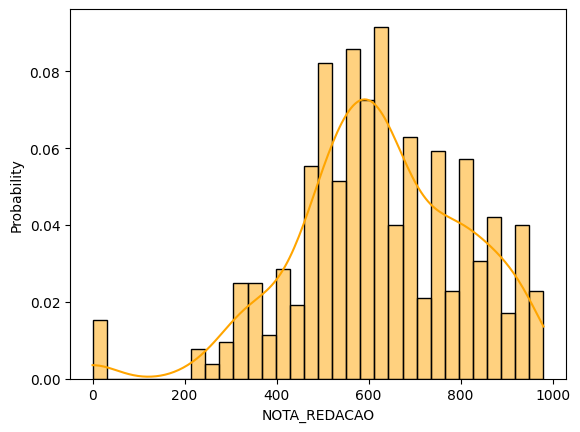

In [61]:
sns.histplot(enem_tupa, x = "NOTA_REDACAO", bins=32, color = "orange", kde=True, stat="probability");

In [62]:
import scipy.stats as stats
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

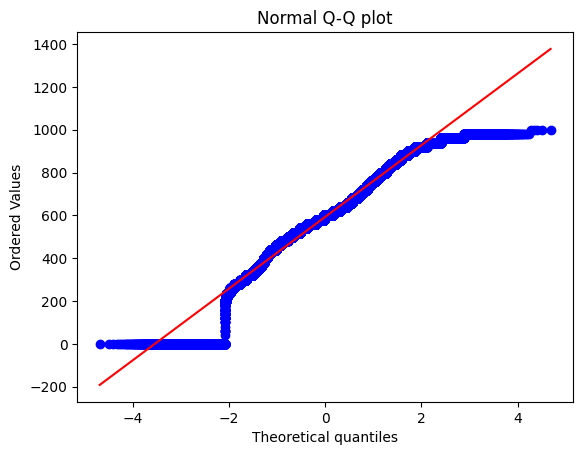

In [63]:
stats.probplot(enem_sp.NOTA_REDACAO, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show

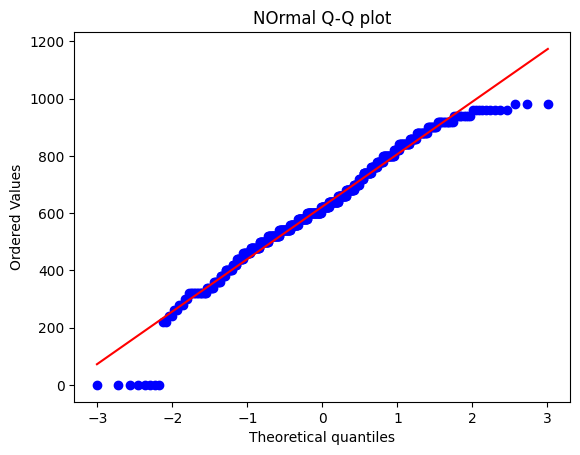

In [64]:
stats.probplot(enem_tupa.NOTA_REDACAO, dist="norm", plot=plt)
plt.title("NOrmal Q-Q plot")
plt.show()

### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [65]:
stats.shapiro(enem_sp.NOTA_REDACAO)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9633597135543823, pvalue=0.0)

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [66]:
stats.shapiro(enem_tupa.NOTA_REDACAO)

ShapiroResult(statistic=0.9733083248138428, pvalue=3.541695647868437e-08)

### Teste Lilliefors (Kolmogorov-Smirnov)

In [67]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [68]:
statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = "norm")

(0.0831243667968013, 0.0009999999999998899)